In [1]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path


In [2]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'

stas = pd.read_csv(path + 'stations.list', delimiter = '\s+')
chans = ['S1', 'S2', 'S3', 'S4']
stas


,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4)
0,KST1,33.5201,135.8363,310,40,85,175
1,HGM1,33.8675,135.7318,337,67,112,202
2,ICU1,33.9001,136.1379,141,231,276,6
3,ANO1,34.7870,136.4019,38,128,173,263
4,SSK1,33.3896,133.3229,355,85,130,220
5,UWA1,33.3859,132.4823,222,312,357,87
6,MUR1,33.2856,134.1563,147,237,282,12
7,MYM1,34.1123,136.1815,237,327,12,102


KST1


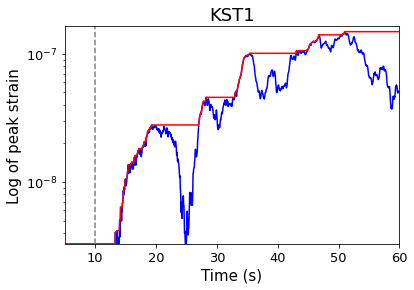

HGM1


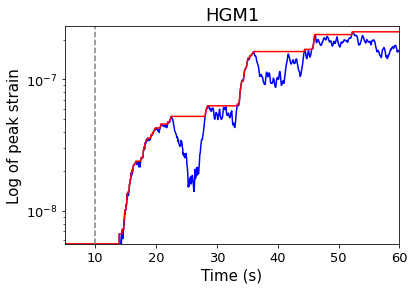

ICU1


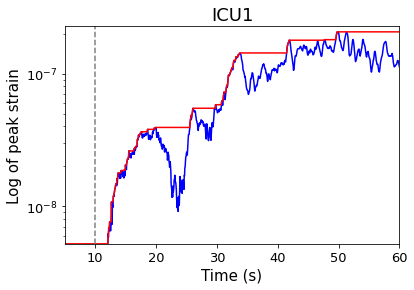

ANO1


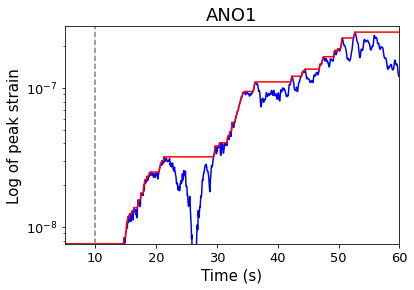

SSK1


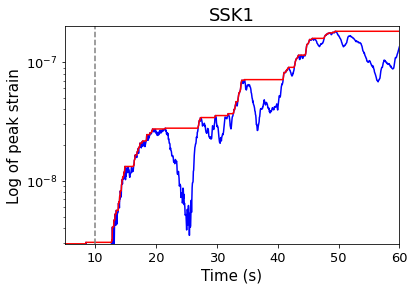

UWA1


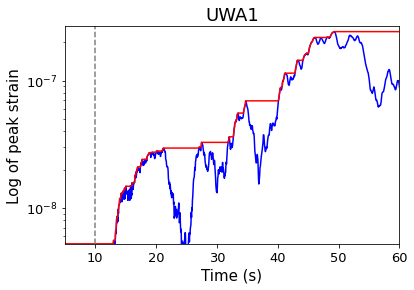

MUR1


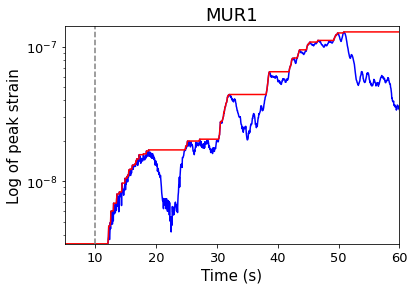

MYM1


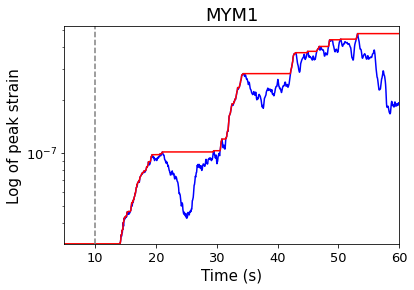

In [3]:
for idx in range(len(stas)):

    sta = stas['Station_name'][idx]
    print(sta)
    # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)
        
    # Strain data

    tRMS = read(path + '3comp_trimmed_rms_newdetrend/' + str(sta) + '.mseed')
    # print('Trimmed RMS data')
    # tRMS.plot()

    #print(tRMS[0].stats)

    tRMS_data = tRMS[0].data # numpy array of strain values

    #tRMS_points = range(tRMS[0].stats.npts) # range of number of points in stream
    #print(np.asarray(tRMS_times)) # prints list of sample numbers
    #tRMS_times = np.asarray(tRMS_points)/(tRMS[0].stats.sampling_rate)
    #print(tRMS_times) # numpy array of time steps

    #insitalize the outut stream
    pst = tRMS.copy()

    # Loop over samples
    for k in range(0,len(tRMS[0].data)): #avoid starting at zero

        if k == 0:
            strain = tRMS[0].data[0]
            max_strain = strain

        else:
            # Grab progressively longer windows and save the biggest strain
            strain = tRMS[0].data[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_strain = max(strain)

        # Put peak strain back into the output stream
        pst[0].data[k] = max_strain 

    pst_times = pst[0].times()
    pst_data = pst[0].data
    pst[0].stats.channel = 'PST' 
#             print('Peak strain data')
#             pst.plot()

    plt.title(sta, fontsize = 18)
    plt.plot(tRMS[0].times(), tRMS[0].data, color = 'blue')
    plt.plot(pst_times, pst_data, color = 'red')
    plt.semilogy()
    plt.ylabel('Log of peak strain', fontsize = 15)
    plt.xlabel('Time (s)', fontsize = 15)
    plt.xlim(5,60)
    plt.ylim(min(pst_data[int(5*20):int(60*20)]), max(pst_data[int(5*20):int(60*20)])*1.1)
    plt.axvline(10, color = 'gray', linestyle = '--')
    plt.tick_params(labelsize = 13)
    plt.show()
      
    # Create folder for the event
    eq_sta_save_dir = path + '3comp_peak_newdetrend/'
    # print(eq_sta_save_dir)
    if os.path.isdir(eq_sta_save_dir):
        pass
    else:
        os.makedirs(eq_sta_save_dir)

    pst.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')
